In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('kyphosis.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
data.shape

(81, 4)

In [8]:
data['Kyphosis'] = pd.factorize(data.Kyphosis)[0]

In [9]:
data.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.209877,83.654321,4.049383,11.493827
std,0.409758,58.104251,1.619423,4.883962
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,26.000000,3.000000,9.000000
50%,0.000000,87.000000,4.000000,13.000000
75%,0.000000,130.000000,5.000000,16.000000
max,1.000000,206.000000,10.000000,18.000000


In [10]:
data.groupby('Kyphosis').mean()

,Age,Number,Start
Kyphosis,,,
0,79.890625,3.750000,12.609375
1,97.823529,5.176471,7.294118


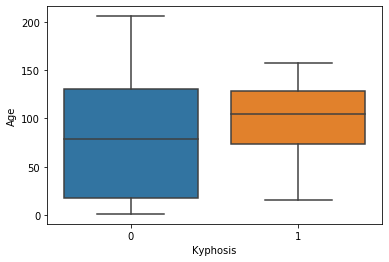

In [23]:
sns.boxplot(x="Kyphosis", y="Age", data=data)

In [38]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [39]:
model_1= smf.glm(formula = 'Kyphosis ~ Age', data=data, family=sm.families.Binomial())

In [42]:
result = model_1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Kyphosis   No. Observations:                   81
Model:                            GLM   Df Residuals:                       79
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.966
Date:                Sun, 20 Jun 2021   Deviance:                       81.932
Time:                        21:16:02   Pearson chi2:                     79.5
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8094      0.530     -3.412      0.0

In [43]:
model_2= smf.glm(formula = 'Kyphosis~ Age + I(Age^2)', data=data, family=sm.families.Binomial())
result = model_2.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Kyphosis   No. Observations:                   81
Model:                            GLM   Df Residuals:                       78
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.963
Date:                Sun, 20 Jun 2021   Deviance:                       81.926
Time:                        21:18:31   Pearson chi2:                     79.4
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8055      0.532     -3.394      0.0

In [52]:
model_3= smf.glm(formula = 'Kyphosis~ Age + I(Age^2) + Number', data=data, family=sm.families.Binomial())
result = model_3.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Kyphosis   No. Observations:                   81
Model:                            GLM   Df Residuals:                       77
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35.234
Date:                Sun, 20 Jun 2021   Deviance:                       70.469
Time:                        23:16:23   Pearson chi2:                     71.1
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8929      1.309     -3.739      0.0

In [53]:
model_4= smf.glm(formula = 'Kyphosis~ Age + Number + I(Age^2) + I(Number^2) + Age*Number', data=data, family=sm.families.Binomial())
result = model_4.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Kyphosis   No. Observations:                   81
Model:                            GLM   Df Residuals:                       75
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33.885
Date:                Sun, 20 Jun 2021   Deviance:                       67.771
Time:                        23:17:41   Pearson chi2:                     67.4
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.0860      2.425     -2.923

In [62]:
x = data.loc[:, data.columns != 'Kyphosis']
y = data.loc[:, data.columns == 'Kyphosis']

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [66]:
result = model_5.fit(x_train, y_train)

ValueError: shapes (81,5) and (64,3) not aligned: 5 (dim 1) != 64 (dim 0)